In [1]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.interpolate import griddata
import scipy.io
import tensorflow as tf
from PIL import Image
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch


Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term



In [2]:
def solution(x1,x2):
    y_f = 12.1
    A_0 = 43.6
    
    A_1 =131.2
    
    C = 56.1
    a=2100
    b=9.45
    y = y_f+(A_0+(A_1-A_0)*np.exp(-x2*x1/(a+b*x2)))*(np.arcsinh(x2/C))
    
    return y


Compiling model...
Building feed-forward neural network...
'build' took 0.044520 s

'compile' took 0.173948 s

Initializing variables...


/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:110: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  kernel_constraint=self.kernel_constraint,
2023-09-04 15:23:36.288186: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 15:23:36.430197: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Training model...

Step      Train loss    Test loss     Test metric   
0         [9.29e+03]    [7.57e+03]    [9.94e-01]    
1000      [3.07e+03]    [1.80e+03]    [4.84e-01]    
2000      [1.49e+03]    [5.82e+02]    [2.75e-01]    
3000      [9.00e+02]    [2.55e+02]    [1.82e-01]    
4000      [5.45e+02]    [1.07e+02]    [1.18e-01]    
5000      [3.11e+02]    [3.74e+01]    [6.98e-02]    
6000      [1.64e+02]    [9.53e+00]    [3.52e-02]    
7000      [7.81e+01]    [9.92e-01]    [1.14e-02]    
8000      [3.25e+01]    [1.47e-02]    [1.39e-03]    
9000      [1.26e+01]    [9.88e-03]    [1.13e-03]    
10000     [4.58e+00]    [1.19e-02]    [1.24e-03]    
11000     [1.52e+00]    [8.03e-03]    [1.02e-03]    
12000     [5.02e-01]    [6.87e-03]    [9.46e-04]    
13000     [1.92e-01]    [1.01e-02]    [1.15e-03]    
14000     [8.01e-02]    [5.98e-03]    [8.83e-04]    
15000     [4.71e-02]    [1.40e-02]    [1.35e-03]    
16000     [2.23e-02]    [5.17e-03]    [8.21e-04]    
17000     [2.47e+00]    [2.

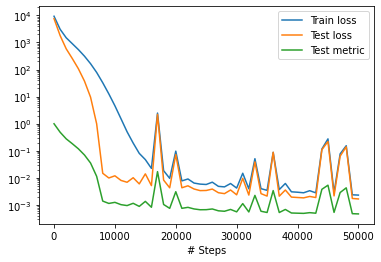

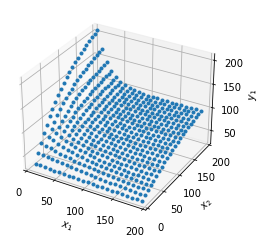

In [3]:
def PDE(x,y):
    
    x1,x2=x[:,0:1],x[:,1:2]#, t,shear rate

    y_f = 12.1
    A_0 = 43.6
    
    A_1 =131.2
    
    C = 56.1
    a=2100
    b=9.45
   
    eq1 = y_f+(A_0+(A_1-A_0)*tf.exp(-x2*x1/(a+b*x2)))*(tf.math.asinh(x2/C))-y
  
    return eq1

def func(x):
    
    return solution(x[:,0:1],x[:,1:2])

geom = dde.geometry.Rectangle([0, 0], [200, 200])

#geom = dde.geometry.TimeDomain(0, 200)
data = dde.data.PDE(geom, PDE, [], 3500, 1000,train_distribution='pseudo',solution=func, num_test=500)

layer_size = [2] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.maps.PFNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(epochs=50000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# FNN training

In [4]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

train=np.loadtxt('train.dat', unpack = True)

x_train = train[[0,1]].T
y_train = train[2]

clf = MLPRegressor(hidden_layer_sizes=(50,50,50),max_iter=50000)

clf.fit(x_train, y_train)


MLPRegressor(hidden_layer_sizes=(50, 50, 50), max_iter=50000)

In [5]:
train1=np.loadtxt('train.dat', unpack = True)
pd.DataFrame(train1.T,columns=['x','t','shear stress'])

,x,t,shear stress
0,54.833378,0.000000,12.100000
1,14.617938,0.000000,12.100000
2,0.000000,145.278503,232.518051
3,59.446281,0.000000,12.100000
4,6.343994,200.000000,224.999435
...,...,...,...
4495,84.869293,133.536407,86.761078
4496,52.359432,10.848490,33.488388
4497,103.085503,61.206860,61.115601
4498,133.831436,55.491055,54.709824


In [6]:
x = np.linspace(0, 200, 200)
t = np.linspace(0, 200, 200)
X, T = np.meshgrid(x, t)

X_star = np.hstack((X.flatten()[:, None], T.flatten()[:, None]))

# solution


/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'
  


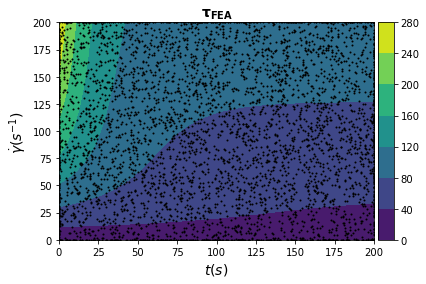

In [7]:
# tau
import pandas as pd
train_lambda=np.loadtxt('train.dat', unpack = True)
train_lambda = pd.DataFrame(train_lambda.T)

ext = griddata(X_star, solution(X_star[:,0],X_star[:,1]), (X, T), method="cubic")
fig, ax = plt.subplots()
h=ax.contourf(X,T, ext,cmap="viridis",origin='lower', aspect='auto',interpolation='nearest')
plt.xlabel('$t(s)$',fontproperties = 'Times New Roman', size = 14)
plt.ylabel('$\dot{\gamma } ( s^{-1}) $ ',fontproperties = 'Times New Roman', size = 14 )
plt.title(r'$\mathbf{\tau_{FEA} }$',fontproperties = 'Times New Roman', size = 14)
# plt.yticks(fontproperties = 'Times New Roman', size = 14)
# plt.xticks(fontproperties = 'Times New Roman', size = 14)

plt.scatter(train_lambda[0],train_lambda[1],c='black',s=1)


from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)
plt.savefig('tau-solution.png',dpi=600,bbox_inches = 'tight')

/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'
  """


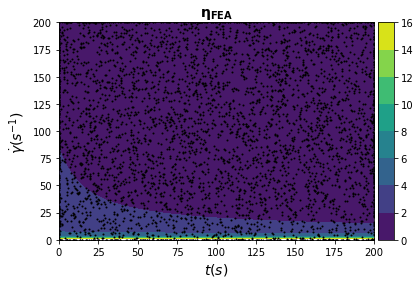

In [8]:
train_lambda=np.loadtxt('train.dat', unpack = True)
train_lambda = pd.DataFrame(train_lambda.T)
ext = griddata(X_star, solution(X_star[:,0],X_star[:,1]), (X, T), method="cubic")
fig, ax = plt.subplots()
h=ax.contourf(X,T, ext/T,cmap="viridis",origin='lower', aspect='auto',interpolation='nearest')
plt.xlabel('$t(s)$',fontproperties = 'Times New Roman', size = 14)
plt.ylabel('$\dot{\gamma } ( s^{-1}) $ ',fontproperties = 'Times New Roman', size = 14 )
plt.title(r'$\mathbf{\eta _{FEA}}$',fontproperties = 'Times New Roman', size = 14)
plt.scatter(train_lambda[0],train_lambda[1],c='black',s=1)
# plt.yticks(fontproperties = 'Times New Roman', size = 14)
# plt.xticks(fontproperties = 'Times New Roman', size = 14)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)

plt.savefig('viscosity-solution.png',dpi=600,bbox_inches = 'tight')

# pinn prediction part: tau, lambda, eta, error.

0.020961999893188477


/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'


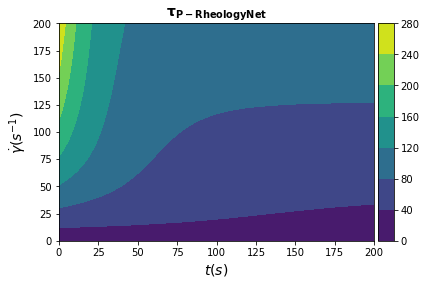

In [25]:
x = np.linspace(0, 200, 200)
t = np.linspace(0, 200, 200)
X, T = np.meshgrid(x, t)

X_star = np.hstack((X.flatten()[:, None], T.flatten()[:, None]))

import time
start=time.time()
prediction = model.predict(X_star, operator=None)
end=time.time()
time_pinn = end-start
print(time_pinn)

pinn_pre = griddata(X_star, prediction[:, 0], (X, T), method="cubic")

fig, ax = plt.subplots()
h=ax.contourf(X,T, pinn_pre,cmap="viridis",origin='lower', aspect='auto',interpolation='nearest')
plt.xlabel('$t(s)$',fontproperties = 'Times New Roman', size = 14)
plt.ylabel('$\dot{\gamma } ( s^{-1}) $ ',fontproperties = 'Times New Roman', size = 14 )
plt.title(r'$\mathbf{\tau _{P-RheologyNet} }$',fontproperties = 'Times New Roman', size = 14)
# plt.yticks(fontproperties = 'Times New Roman', size = 14)
# plt.xticks(fontproperties = 'Times New Roman', size = 14)


from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)
plt.savefig('tau-pinn.png',dpi=600,bbox_inches = 'tight')

# eta

/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'
  del sys.path[0]


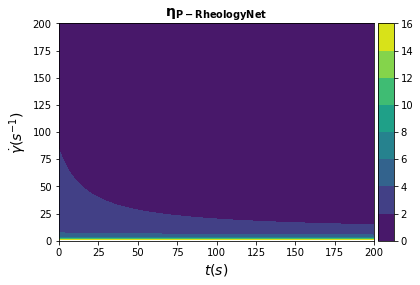

In [24]:
from matplotlib import ticker, cm
x = np.linspace(0, 200, 200)
t = np.linspace(0, 200, 200)
X, T = np.meshgrid(x, t)

X_star = np.hstack((X.flatten()[:, None], T.flatten()[:, None]))
prediction = model.predict(X_star, operator=None)

pinn_pre = griddata(X_star, prediction[:, 0], (X, T), method="cubic")

fig, ax = plt.subplots()
# norm = matplotlib.colors.Normalize(vmin=0, vmax=100)
h=ax.contourf(X,T, pinn_pre/T,cmap="viridis",origin='lower',aspect='auto',interpolation='nearest')
plt.xlabel('$t(s)$',fontproperties = 'Times New Roman', size = 14)
plt.ylabel('$\dot{\gamma } ( s^{-1}) $ ',fontproperties = 'Times New Roman', size = 14 )
plt.title(r'$\mathbf{\eta _{P-RheologyNet} }$',fontproperties = 'Times New Roman', size = 14)


from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)
plt.savefig('eta-pinn.png',dpi=600,bbox_inches = 'tight')

# nn pre

0.028339862823486328


/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'
  app.launch_new_instance()


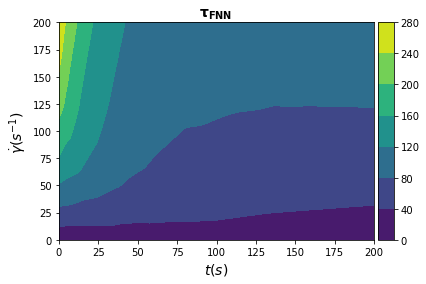

In [11]:
x = np.linspace(0, 200, 200)
t = np.linspace(0, 200, 200)
X, T = np.meshgrid(x, t)

X_star = np.hstack((X.flatten()[:, None], T.flatten()[:, None]))

start_fnn=time.time()
prediction = clf.predict(X_star)
end_fnn=time.time()
time_fnn = end_fnn-start_fnn
print(time_fnn)

pre_nn = griddata(X_star, prediction, (X, T), method="cubic")

fig, ax = plt.subplots()
h=ax.contourf(X,T, pre_nn,cmap="viridis",origin='lower', aspect='auto',interpolation='nearest')
plt.xlabel('$t(s)$',fontproperties = 'Times New Roman', size = 14)
plt.ylabel('$\dot{\gamma } ( s^{-1}) $ ',fontproperties = 'Times New Roman', size = 14 )
plt.title(r'$\mathbf{\tau _{FNN} }$ ',fontproperties = 'Times New Roman', size = 14)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)
plt.savefig('tau-FNN.png',dpi=600,bbox_inches = 'tight')

/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'
  if sys.path[0] == '':


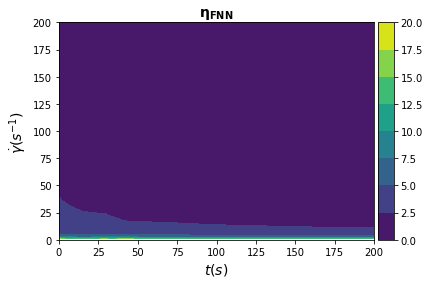

In [12]:
x = np.linspace(0, 200, 200)
t = np.linspace(0, 200, 200)
X, T = np.meshgrid(x, t)

X_star = np.hstack((X.flatten()[:, None], T.flatten()[:, None]))

prediction = clf.predict(X_star)

pre_nn = griddata(X_star, prediction, (X, T), method="cubic")

fig, ax = plt.subplots()
h=ax.contourf(X,T, pre_nn/T,cmap="viridis",origin='lower', aspect='auto',interpolation='nearest')
plt.xlabel('$t(s)$',fontproperties = 'Times New Roman', size = 14)
plt.ylabel('$\dot{\gamma } ( s^{-1}) $ ',fontproperties = 'Times New Roman', size = 14 )
plt.title(r'$\mathbf{\eta _{FNN} }$ ',fontproperties = 'Times New Roman', size = 14)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)
plt.savefig('FNN_pre.png',dpi=600,bbox_inches = 'tight')

# nn err

/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'
  This is separate from the ipykernel package so we can avoid doing imports until


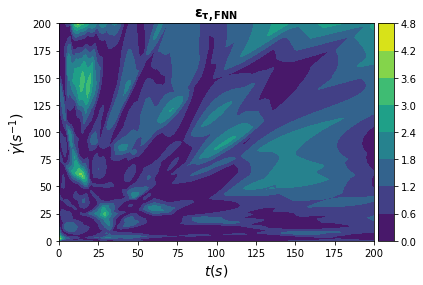

In [13]:
err_nn = abs(pre_nn-ext)
fig, ax = plt.subplots()
h=ax.contourf(X,T, err_nn,cmap="viridis",origin='lower', aspect='auto',interpolation='nearest')
plt.xlabel('$t(s)$',fontproperties = 'Times New Roman', size = 14)
plt.ylabel('$\dot{\gamma } ( s^{-1}) $ ',fontproperties = 'Times New Roman', size = 14 )
plt.title(r'$\mathbf{\varepsilon _{\tau ,FNN}   } $ ',fontproperties = 'Times New Roman', size = 14)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)
plt.savefig('err_tau-FNN.png',dpi=600,bbox_inches = 'tight')

/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.
/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'
  This is separate from the ipykernel package so we can avoid doing imports until


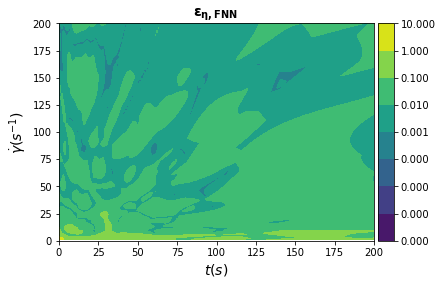

In [14]:
err_nn = abs(pre_nn/T-ext/T)
fig, ax = plt.subplots()
h=ax.contourf(X,T, err_nn,cmap="viridis",origin='lower', aspect='auto',interpolation='nearest',locator=ticker.LogLocator())
plt.xlabel('$t(s)$',fontproperties = 'Times New Roman', size = 14)
plt.ylabel('$\dot{\gamma } ( s^{-1}) $ ',fontproperties = 'Times New Roman', size = 14 )
plt.title(r'$\mathbf{\varepsilon _{\eta ,FNN}   } $ ',fontproperties = 'Times New Roman', size = 14)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)
plt.savefig('err-FNN-eta.png',dpi=600,bbox_inches = 'tight')

# pinn error

/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'
  after removing the cwd from sys.path.


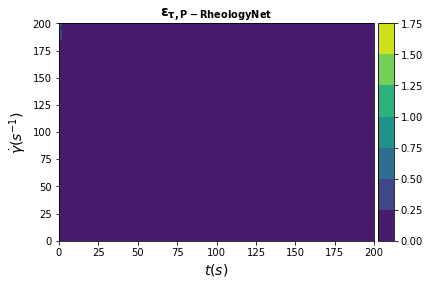

In [22]:
from matplotlib import ticker, cm
err_pinn_tau = abs(pinn_pre-ext)
fig, ax = plt.subplots()
h=ax.contourf(X,T, err_pinn_tau,cmap="viridis",origin='lower', aspect='auto',interpolation='nearest')
plt.xlabel('$t(s)$',fontproperties = 'Times New Roman', size = 14)
plt.ylabel('$\dot{\gamma } ( s^{-1}) $ ',fontproperties = 'Times New Roman', size = 14 )
plt.title(r'$\mathbf{\varepsilon _{\tau ,P-RheologyNet}  } $ ',fontproperties = 'Times New Roman', size = 14)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)
plt.savefig('err-rn-tau.png',dpi=600,bbox_inches = 'tight')

/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.
/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The following kwargs were not used by contour: 'aspect', 'interpolation'
  This is separate from the ipykernel package so we can avoid doing imports until


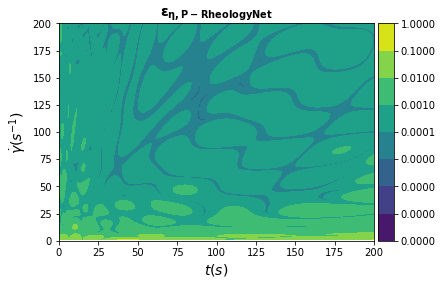

In [23]:
err_pinn_eta = abs(pinn_pre/T-ext/T)
fig, ax = plt.subplots()
h=ax.contourf(X,T, err_pinn_eta,cmap="viridis",origin='lower',aspect='auto',interpolation='nearest',locator=ticker.LogLocator())
plt.xlabel('$t(s)$',fontproperties = 'Times New Roman', size = 14)
plt.ylabel('$\dot{\gamma } ( s^{-1}) $ ',fontproperties = 'Times New Roman', size = 14 )
plt.title(r'$\mathbf{\varepsilon _{\eta ,P-RheologyNet}  } $ ',fontproperties = 'Times New Roman', size = 14)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)
plt.savefig('err-rn-eta.png',dpi=600,bbox_inches = 'tight')

# PINN MSE

In [17]:
from sklearn.metrics import mean_squared_error
eta_pre= pinn_pre/T
eta_pre[eta_pre>1e308]=0

eta_ext=ext/T
eta_ext[eta_ext>1e308]=0
eta_nn = pre_nn/T

eta_nn[eta_nn>1e308]=0

print('tau-mse-pinn',mean_squared_error(pinn_pre,ext))
print('eta-mse-pinn',mean_squared_error(eta_pre,eta_ext))
print('tau-mse-fnn',mean_squared_error(pre_nn,ext))
print('eta-mse-fnn',mean_squared_error(eta_nn,eta_ext))

print('pinn_time',time_pinn)
print('fnn_time',time_fnn)

tau-mse-pinn 0.0019790919919180252
eta-mse-pinn 2.9403391891013987e-05
tau-mse-fnn 1.3971559889290972
eta-mse-fnn 0.0033500707414719257
pinn_time 0.029162883758544922
fnn_time 0.028339862823486328


/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/zhangtianjie/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
